In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [2]:
wine_data=pd.read_csv(r"C:\Users\user\Downloads\wine.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.shape

(178, 13)

In [4]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wine_data.info

<bound method DataFrame.info of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  

In [6]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# 2.Try out different clustering models in the Wine dataset


In [7]:
wine_X = wine_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [8]:
wine_Y = wine_data
wine_Y = np.array(wine_Y)

In [9]:
# Wine dataset for KMeans

from sklearn.cluster import KMeans

In [10]:
import warnings
warnings.filterwarnings('ignore')
# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

# Elbow plot (Kmeans) for Wine dataset


Text(0, 0.5, 'WCSS')

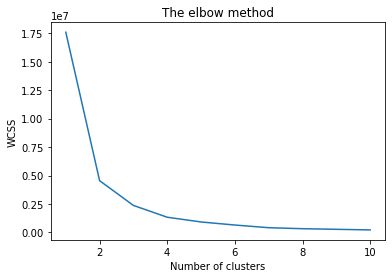

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Number of optimum clusters in kmeans 3.

In [13]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

# Kmeans Clustering plot for Wine dataset

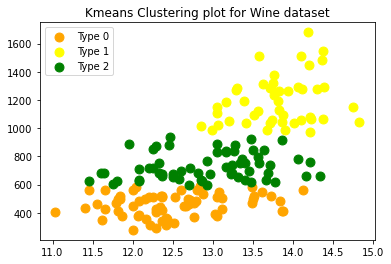

In [14]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. we can visualize these clusters.

plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

# PCA cluster plot for Wine Dataset

In [15]:
#Importing libraries from SKLEARN

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [16]:
#loading Wine dataset
wine = datasets.load_wine()

X = wine.data
y = wine.target
target_names = wine.target_names

pca = PCA(n_components=13)
wine_X = pca.fit(X).transform(X)

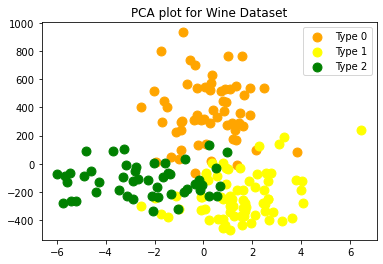

In [17]:
plt.scatter(wine_X[y == 0, 3], wine_X[y == 0, 0], s =80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[y == 1, 3], wine_X[y == 1, 0], s =80,  c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[y == 2, 3], wine_X[y == 2, 0], s =80,  c = 'green', label = 'Type 2')
plt.title('PCA plot for Wine Dataset')
plt.legend()

# 3.Find the optimum number of clusters in each model and create the model with the optimum number of clusters

# Hierarchical clustering Analysis (HCA)


In [18]:
# Hierarchical Clustering
# Import Library
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine

# Hierarchical Dendrogram plot for Wine dataset¶

In [19]:
# Plotting of Dendrogram
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

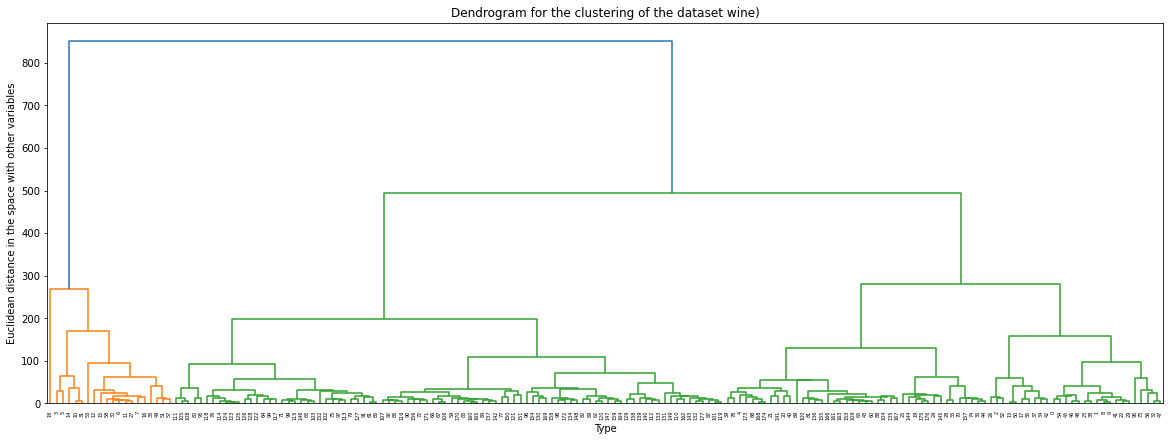

In [21]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [23]:
# Building an Agglomerative Clustering Model

#Initialise Model

cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

# Hierarchical cluster plot for Wine dataset


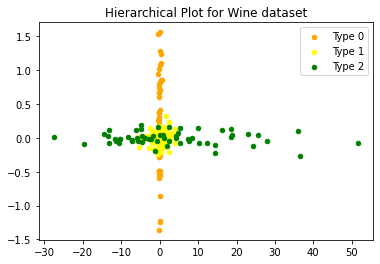

In [24]:
# Plotting the HCA Cluster

plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [25]:
import sklearn.metrics as sm

target = pd.DataFrame(wine.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(wine_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6966292134831461